# Uploading the raw data to the database


In [2]:
# importing necessary Libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

In [3]:
#Path to the .csv file
csv_path = os.path.join(os.getcwd(), '../data/candidates.csv')

#reading the .csv file
df = pd.read_csv(csv_path, sep=';')

In [4]:
df.head()

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


In [5]:
# Path to the .env file to get the credentials
def engine():
    dotenv_path = os.path.join(os.getcwd(), '../credentials.env')
    load_dotenv(dotenv_path=dotenv_path)
    host=os.getenv("HOST")
    user=os.getenv("USER")
    password=os.getenv("PASSWORD")
    port=os.getenv("PORT")
    database=os.getenv("DATABASE")
    dbms=os.getenv("DBMS")

    #Connection to the database
    engine = create_engine(f'{dbms}://{user}:{password}@{host}:{port}/{database}')
    return engine

In [6]:
#Uploading the data to the database
df.to_sql('raw_data_candidates', engine(), if_exists='replace', index=False)

1000

# Extracting the Data

In [7]:
query = 'SELECT * FROM raw_data_candidates'
df = pd.read_sql(query, engine())
df = pd.DataFrame(df)

# EDA

In [8]:
df.head()

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


In [10]:
df.shape

(50000, 10)

In [6]:
df.columns

Index(['First Name', 'Last Name', 'Email', 'Application Date', 'Country',
       'YOE', 'Seniority', 'Technology', 'Code Challenge Score',
       'Technical Interview Score'],
      dtype='object')

In [7]:
df.describe()

,YOE,Code Challenge Score,Technical Interview Score
count,50000.000000,50000.000000,50000.000000
mean,15.286980,4.996400,5.003880
std,8.830652,3.166896,3.165082
min,0.000000,0.000000,0.000000
25%,8.000000,2.000000,2.000000
50%,15.000000,5.000000,5.000000
75%,23.000000,8.000000,8.000000
max,30.000000,10.000000,10.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   First Name                 50000 non-null  object
 1   Last Name                  50000 non-null  object
 2   Email                      50000 non-null  object
 3   Application Date           50000 non-null  object
 4   Country                    50000 non-null  object
 5   YOE                        50000 non-null  int64 
 6   Seniority                  50000 non-null  object
 7   Technology                 50000 non-null  object
 8   Code Challenge Score       50000 non-null  int64 
 9   Technical Interview Score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


In [9]:
unique_Countries = df['Country'].unique().tolist()
print(len(unique_Countries))

244


There's a problem with the name of the countries,
 'cause there are more number of countries than the ones that exist in the world.
 The number of countries in the world it's 195 (ONU). This give us the idea that maybe, we have
 states like country records.

In [10]:
df['Seniority'].unique().tolist()

['Intern', 'Mid-Level', 'Trainee', 'Junior', 'Lead', 'Architect', 'Senior']

In [11]:
df['Technology'].unique().tolist()

['Data Engineer',
 'Client Success',
 'QA Manual',
 'Social Media Community Management',
 'Adobe Experience Manager',
 'Sales',
 'Mulesoft',
 'DevOps',
 'Development - CMS Backend',
 'Salesforce',
 'System Administration',
 'Security',
 'Game Development',
 'Development - CMS Frontend',
 'Security Compliance',
 'Development - Backend',
 'Design',
 'Business Analytics / Project Management',
 'Development - Frontend',
 'Development - FullStack',
 'Business Intelligence',
 'Database Administration',
 'QA Automation',
 'Technical Writing']

## Copy of the Data Extracted

In [11]:
#First we need to make a copy of the original dataframe
df_Copy = df.copy()

In [12]:
# Rename Columns
def rename_columns(df):
    df.rename(columns={'First Name': 'Name',
                         'Last Name': 'Last_Name',
                         'Application Date' : 'Date',
                         'Code Challenge Score' : 'Code_Score',
                         'Technical Interview Score' : 'Interview_Score'}, inplace=True)
    return df

rename_columns(df_Copy)

,Name,Last_Name,Email,Date,Country,YOE,Seniority,Technology,Code_Score,Interview_Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7
...,...,...,...,...,...,...,...,...,...,...
49995,Bethany,Shields,rocky_mitchell@hotmail.com,2022-01-09,Dominican Republic,27,Trainee,Security,2,1
49996,Era,Swaniawski,dolores.roob@hotmail.com,2020-06-02,Morocco,21,Lead,Game Development,1,2
49997,Martin,Lakin,savanah.stracke@gmail.com,2018-12-15,Uganda,20,Trainee,System Administration,6,1
49998,Aliya,Abernathy,vivienne.fritsch@yahoo.com,2020-05-30,Czech Republic,20,Senior,Database Administration,0,0


In [13]:
# Adding the column "hired"
df_Copy["Hired"] = df_Copy.apply(lambda row: 1 if row["Code_Score"] >= 7 else 0, axis=1)

In [14]:
#verify if the column was added
df_Copy.columns

Index(['Name', 'Last_Name', 'Email', 'Date', 'Country', 'YOE', 'Seniority',
       'Technology', 'Code_Score', 'Interview_Score', 'Hired'],
      dtype='object')

In [15]:
# Searching for reapplicants
grouped_df = df_Copy.groupby('Email').agg({
    'Technology': list,
    'Code_Score': list,
    'Interview_Score': list,
    'Email': 'size',
    'Country': list,
    'Seniority': list,
    'YOE': list
}).rename(columns={'Email': 'ApplicationsCount'}).reset_index()

filtered_df = grouped_df[grouped_df['ApplicationsCount'] > 1]

print(f"Number of reapplicants: {filtered_df.shape[0]}")
filtered_df.head(20)

Number of reapplicants: 165


,Email,Technology,Code_Score,Interview_Score,ApplicationsCount,Country,Seniority,YOE
93,abbigail94@yahoo.com,"[Client Success, DevOps]","[5, 6]","[8, 2]",2,"[Dominican Republic, Croatia]","[Mid-Level, Junior]","[21, 4]"
420,addison_bode@hotmail.com,"[Development - Backend, Database Administration]","[7, 10]","[2, 3]",2,"[Luxembourg, Lithuania]","[Lead, Architect]","[4, 24]"
1137,alberta95@gmail.com,"[Salesforce, Adobe Experience Manager]","[9, 7]","[1, 2]",2,"[Germany, Afghanistan]","[Architect, Junior]","[25, 21]"
1163,alberto11@yahoo.com,"[Business Intelligence, Sales]","[2, 0]","[9, 4]",2,"[Taiwan, Democratic People's Republic of Korea]","[Architect, Intern]","[25, 27]"
1286,alejandra17@hotmail.com,"[Development - Backend, Development - FullStack]","[6, 2]","[10, 9]",2,"[Ecuador, Iceland]","[Intern, Architect]","[19, 21]"
1445,alex83@gmail.com,"[QA Automation, Data Engineer]","[3, 8]","[1, 6]",2,"[Liberia, Solomon Islands]","[Lead, Lead]","[7, 4]"
1508,alexandra_smitham@yahoo.com,"[Game Development, Development - CMS Frontend]","[1, 10]","[9, 4]",2,"[Dominican Republic, Burkina Faso]","[Architect, Trainee]","[12, 10]"
1592,alexane76@yahoo.com,"[Mulesoft, Game Development]","[10, 1]","[0, 10]",2,"[Barbados, Gambia]","[Senior, Senior]","[1, 3]"
1721,alfonso31@hotmail.com,"[Game Development, Development - Backend]","[4, 6]","[9, 10]",2,"[Myanmar, Tajikistan]","[Lead, Lead]","[30, 21]"
2032,allen66@gmail.com,"[Development - FullStack, Technical Writing]","[8, 6]","[4, 7]",2,"[Cote d'Ivoire, Italy]","[Lead, Senior]","[4, 19]"


In [16]:
print(f"Max number of reapplicants: {max(filtered_df['ApplicationsCount'])}")
print(f"Min number of reapplicants: {min(filtered_df['ApplicationsCount'])}")

Max number of reapplicants: 3
Min number of reapplicants: 2


As we can see, there are many reapplicants, with the maximum number of times a person has reapplied being 3

In [17]:
import matplotlib.pyplot as plt

In [18]:
df_Copy['Date'] = pd.to_datetime(df_Copy['Date'])

# GRoup by Date
df_Copy['Year'] = df_Copy['Date'].dt.year
#Filtering just for hired candidates
df_hired = df_Copy[df_Copy['Hired'] == 1]


In [19]:
df_hired.shape

(18232, 12)

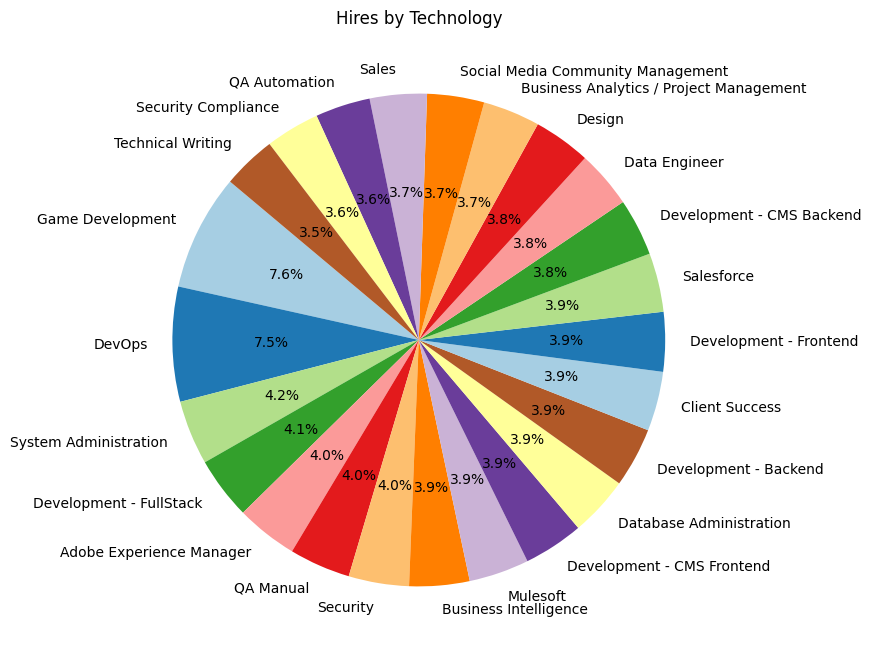

In [20]:
#Hires by technology
technology_counts = df_hired['Technology'].value_counts()
plt.figure(figsize=(8, 8))
technology_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Hires by Technology')
plt.ylabel('')
plt.show()

As we can see, the only significant differences are in DevOps and Game Development, both around 7.6%. This isn't the best plot, but in the future steps I fixed it.

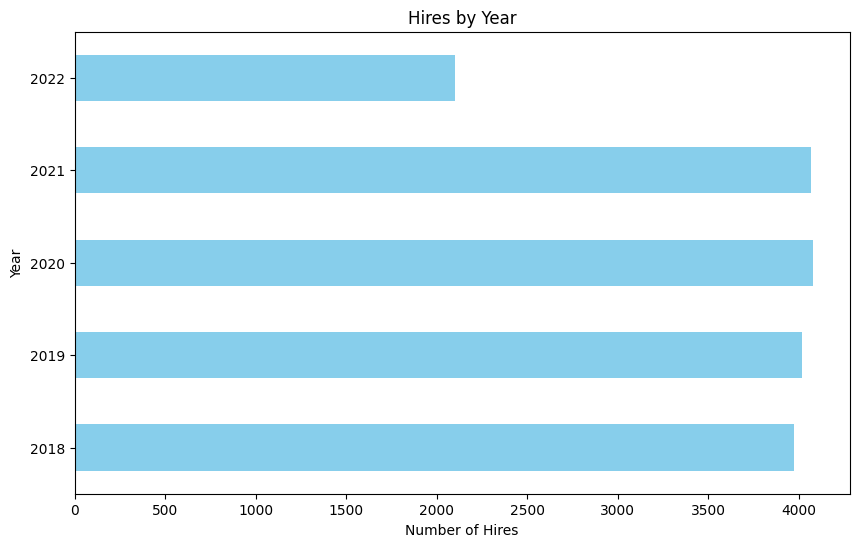

In [17]:
# Hires by year
hires_by_year = df_hired['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
hires_by_year.plot.barh(color='skyblue')
plt.title('Hires by Year')
plt.xlabel('Number of Hires')
plt.ylabel('Year')
plt.show()

We don't have significant differences over the years in the number of applicants. By the way, 2022 is excluded from the analysis because the year is incomplete.

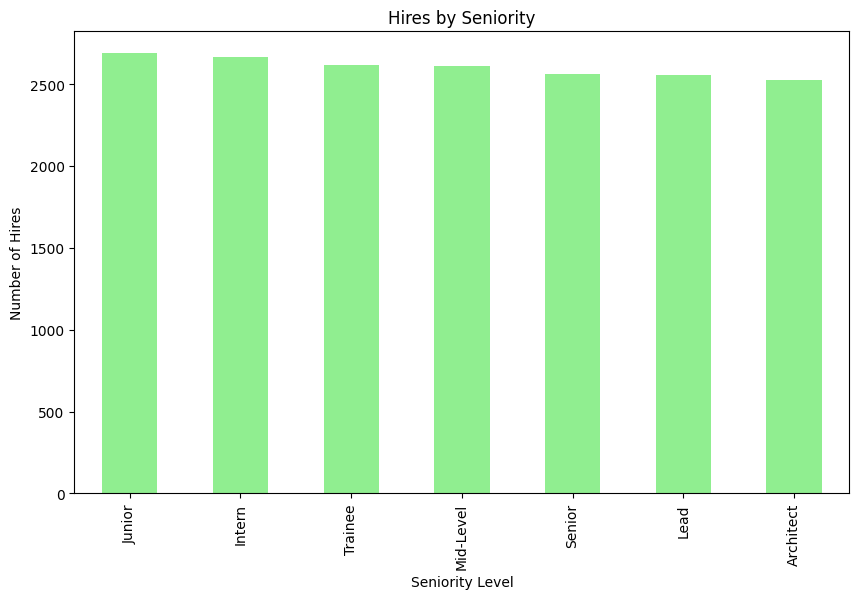

In [21]:
# Hires by seniority (bar chart)
seniority_counts = df_hired['Seniority'].value_counts()
plt.figure(figsize=(10, 6))
seniority_counts.plot.bar(color='lightgreen')
plt.title('Hires by Seniority')
plt.xlabel('Seniority Level')
plt.ylabel('Number of Hires')
plt.show()

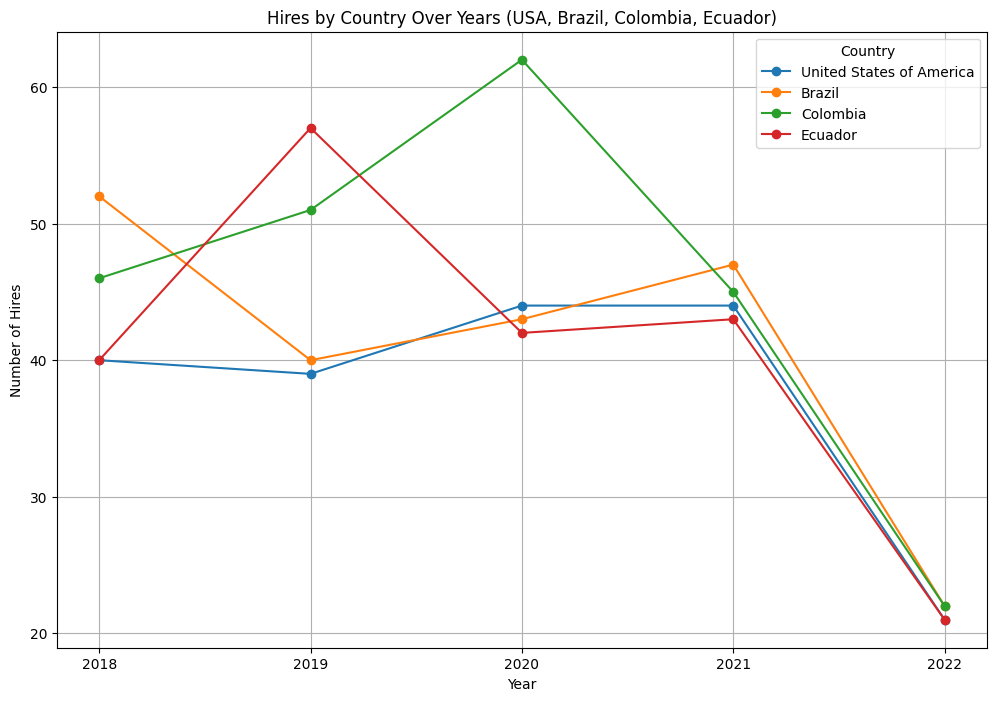

In [22]:
# List with the names of the countries of interest
countries = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']

#Filtering the dataframe with the countries of interest
df_filtered = df_Copy[df_Copy['Country'].isin(countries)]

#groupping by year and country
hires_by_country_year = df_filtered.groupby(['Year', 'Country']).size().unstack().fillna(0)

## Ploting
plt.figure(figsize=(12, 8))
for country in countries:
    plt.plot(hires_by_country_year.index, hires_by_country_year[country], marker='o', label=country)

plt.title('Hires by Country Over Years (USA, Brazil, Colombia, Ecuador)')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.xticks(hires_by_country_year.index) 
plt.legend(title='Country')
plt.grid(True)
plt.show()

Of the selected countries, those that had a high number of applicants were Colombia and Ecuador, in the years 2019 and 2020 respectively

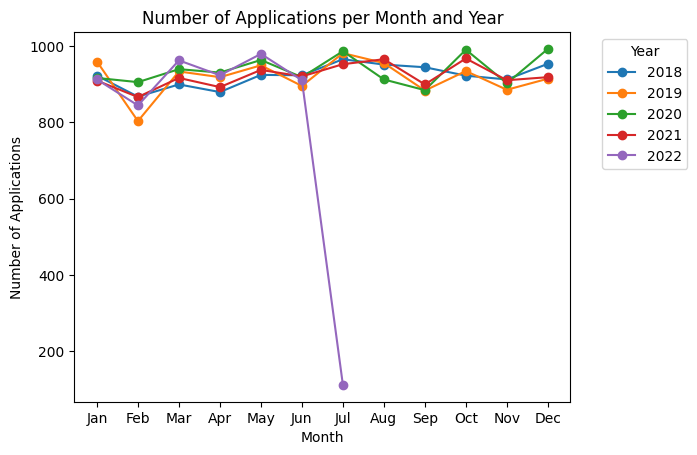

In [20]:
# Extract the month from the date
df_Copy['Month'] = df_Copy['Date'].dt.month

# Group by year and month and count the number of applications
applications_per_month = df_Copy.groupby(['Year', 'Month']).size().unstack(level=0)

# Plot the data
applications_per_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.title('Number of Applications per Month and Year')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

As we can see, the number of applications has followed a consistent pattern over the years. However, there is a significant decrease in applications from February and again from August to September. We can't draw conclusions for 2022 because the year is not yet finished.

There's more applicants for DevOps and  Game Development

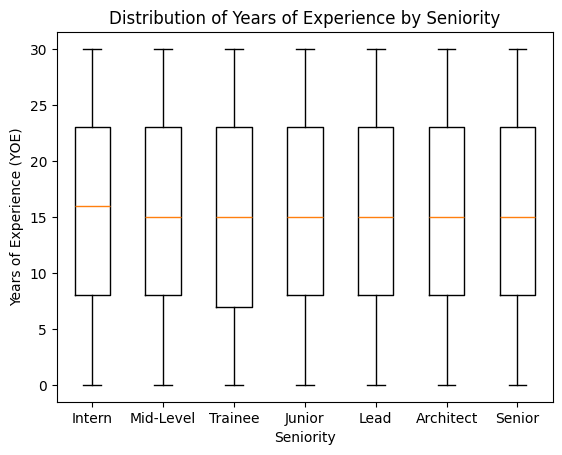

In [35]:
#create the boxplot
fig, ax = plt.subplots()
ax.boxplot([df_Copy[df_Copy['Seniority'] == category]['YOE'] for category in df_Copy['Seniority'].unique()])

#customize the plot
ax.set_xticklabels(df_Copy['Seniority'].unique())
ax.set_xlabel('Seniority')
ax.set_ylabel('Years of Experience (YOE)')
ax.set_title('Distribution of Years of Experience by Seniority')

plt.show()

The fact that every level of seniority has the same distribution of Years of Experience (YOE)
is unusual because the expected result would show significant differences between them.
This observation reaffirms that the data is synthetic.

# Transform Data

In [23]:
#importing libraries to get the normalized country names and the continent
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
import pycountry_convert as pc
import json

In [26]:
#I repeat the same process to get the raw data 'cause
# I made some changes in the previous steps
df_Copy = df.copy()
df_Copy.head()

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


In [27]:
rename_columns(df_Copy)

,Name,Last_Name,Email,Date,Country,YOE,Seniority,Technology,Code_Score,Interview_Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7
...,...,...,...,...,...,...,...,...,...,...
49995,Bethany,Shields,rocky_mitchell@hotmail.com,2022-01-09,Dominican Republic,27,Trainee,Security,2,1
49996,Era,Swaniawski,dolores.roob@hotmail.com,2020-06-02,Morocco,21,Lead,Game Development,1,2
49997,Martin,Lakin,savanah.stracke@gmail.com,2018-12-15,Uganda,20,Trainee,System Administration,6,1
49998,Aliya,Abernathy,vivienne.fritsch@yahoo.com,2020-05-30,Czech Republic,20,Senior,Database Administration,0,0


In [32]:
"""
This sectione it's about the normalization of the countries names.
This search the country name in the json file and if it's not found
it will be printed in the console.
"""
#Path to the json file
json_path = os.path.join(os.getcwd(), '..','src/' 'custom.geo.json')

# Check if the file exists
if not os.path.exists(json_path):
    raise FileNotFoundError(f"Can't found the path: {json_path}")

#Transforming the countries names to a list
countries = df_Copy['Country'].unique().tolist() 

#reading the json file
with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

#Extracting the countries names from the json file
json_countries = [feature['properties']['name_en'] for feature in data['features']]

#Comparing the countries names from the dataframe with the json file
missing_countries = [country for country in countries if country not in json_countries]

#showing the countries not found in the json file
print(f"Countries that can't be found:\n{missing_countries} \n The number of missing countries is: {len(missing_countries)}")


Countries that can't be found:
['Timor-Leste', 'French Southern Territories', 'Brunei Darussalam', 'Palestinian Territory', 'Micronesia', 'Macao', 'Slovakia (Slovak Republic)', 'Guadeloupe', 'Svalbard & Jan Mayen Islands', 'Holy See (Vatican City State)', 'Republic of Korea', 'Falkland Islands (Malvinas)', "Lao People's Democratic Republic", 'Gibraltar', 'Antarctica (the territory South of 60 deg S)', 'Virgin Islands British', 'British Indian Ocean Territory (Chagos Archipelago)', 'Kyrgyz Republic', 'Congo', "Cote d'Ivoire", 'Libyan Arab Jamahiriya', 'Bahamas', 'Reunion', 'United States Minor Outlying Islands', "Democratic People's Republic of Korea", 'Gambia', 'Virgin Islands U.S.', 'Saint Barthelemy', 'China', 'Tokelau', 'Swaziland', 'Macedonia', 'Netherlands Antilles', 'Syrian Arab Republic', 'Cocos (Keeling) Islands', 'Russian Federation', 'Martinique', 'Bouvet Island (Bouvetoya)', 'French Guiana', 'Christmas Island', 'Sao Tome and Principe', 'Mayotte'] 
 The number of missing coun

In [33]:
#Function to normalize the country names
def normalize_country(place):
    geolocator = Nominatim(user_agent="my_app")
    try:
        location = geolocator.geocode(place, exactly_one=True, language="en")
        if location:
            if 'address' in location.raw:
                address = location.raw['address']
                country = address.get('country', '')
                if country:
                    return country
            return location.raw.get('display_name', '').split(', ')[-1]
        else:
            return place
    except (GeocoderTimedOut, GeocoderUnavailable, KeyError, AttributeError):
        return place

#Function to get the continent from the country
def get_continent_from_country(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
    except KeyError:
        continent_name = "Unknown"
    return continent_name

#Filtering the missing countries
df_missing = df_Copy[df_Copy['Country'].isin(missing_countries)].copy()

# Asegurarse de que la columna 'Country_Normalized' existe en el DataFrame original
df_Copy['Country_Normalized'] = df_Copy['Country']

# Normalizing the missing countries
normalized_countries = {}
for place in missing_countries:
    normalized_country = normalize_country(place)
    normalized_countries[place] = normalized_country
    df_missing.loc[df_missing['Country'] == place, 'Country_Normalized'] = normalized_country
    print(f"Data Processed: {place} -> {normalized_country}")

#Update the missing countries in the original dataframe
df_Copy.update(df_missing)

# Get the unique normalized countries
unique_normalized_countries = df_Copy['Country_Normalized'].unique().tolist()
normalized_continents = {}
for normalized_country in unique_normalized_countries:
    continent = get_continent_from_country(normalized_country)
    normalized_continents[normalized_country] = continent

# Update the continent column
df_Copy['Continent'] = df_Copy['Country_Normalized'].map(normalized_continents)

#Show the results
#This to show the process.
print("\n Final Results:")
for place in countries:
    normalized_country = normalized_countries.get(place, place)
    continent = normalized_continents.get(normalized_country, "Unknown")
    print(f"{place}: {normalized_country} - {continent}")


Data Processed: Timor-Leste -> East Timor
Data Processed: French Southern Territories -> France
Data Processed: Brunei Darussalam -> Brunei
Data Processed: Palestinian Territory -> Palestinian Territories
Data Processed: Micronesia -> Federated States of Micronesia
Data Processed: Macao -> China
Data Processed: Slovakia (Slovak Republic) -> Slovakia
Data Processed: Guadeloupe -> France
Data Processed: Svalbard & Jan Mayen Islands -> Svalbard & Jan Mayen Islands
Data Processed: Holy See (Vatican City State) -> Holy See (Vatican City State)
Data Processed: Republic of Korea -> South Korea
Data Processed: Falkland Islands (Malvinas) -> Falkland Islands
Data Processed: Lao People's Democratic Republic -> Laos
Data Processed: Gibraltar -> Gibraltar
Data Processed: Antarctica (the territory South of 60 deg S) -> Antarctica (the territory South of 60 deg S)
Data Processed: Virgin Islands British -> British Virgin Islands
Data Processed: British Indian Ocean Territory (Chagos Archipelago) -> B

In [34]:
df_Copy.head()

,Name,Last_Name,Email,Date,Country,YOE,Seniority,Technology,Code_Score,Interview_Score,Country_Normalized,Continent
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,Norway,Europe
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,Panama,North America
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,Belarus,Europe
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,Eritrea,Africa
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,Myanmar,Asia


In [35]:
df_Copy.shape

(50000, 12)

In [36]:
""" 
A dictionary with the replacements for a few countries
this was necessary because some names are written in a 
 different way in the json file that it's indispensable to make the dashboard
"""
replacement_dict = {
    "United States": "United States of America",
    "Ascension and Tristan da Cunha": "Saint Helena",
    "China": "People's Republic of China",
    "Palestinian Territories": "Palestine",
    "Antarctica (the territory South of 60 deg S)": "Antarctica",
    "Côte d'Ivoire": "Ivory Coast",
    "Bahamas": "The Bahamas",
    "Czechia": "Czech Republic",
    "New Caledonia (EEZ)": "New Caledonia"
}

# Replace the values in the DataFrame
df_Copy['Country_Normalized'] = df_Copy['Country_Normalized'].replace(replacement_dict)

In [38]:
# Path to the JSON file
json_path = os.path.join(os.getcwd(), '..','src/','custom.geo.json')

# Check if the file exists
if not os.path.exists(json_path):
    raise FileNotFoundError(f"Can't found the path: {json_path}")

# Convert the normalized countries to a list
countries = df_Copy['Country_Normalized'].unique().tolist()

# Load the GeoJSON data
with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

""" 
Extract the name of the countries with the label 'name_en'
This label contents the name of the countries in English, that is the
language used in the dataframe.
"""
json_countries = [feature['properties']['name_en'] for feature in data['features']]

# Find the countries that are in the DataFrame but not in the GeoJSON file
missing_countries = [country for country in countries if country not in json_countries]

# Show the results
print(f"Countries can´t found in the GeoJSON file:\n{missing_countries} \n The number of missing countries is: {len(missing_countries)}")


Countries can´t found in the GeoJSON file:
['Svalbard & Jan Mayen Islands', 'Holy See (Vatican City State)', 'Gibraltar', 'Tokelau'] 
 The number of missing countries is: 4


In [39]:
df_Copy["Hired"] = df_Copy.apply(lambda row: 1 if row["Code_Score"] >= 7 else 0, axis=1)

In [40]:
df_Copy.head()

,Name,Last_Name,Email,Date,Country,YOE,Seniority,Technology,Code_Score,Interview_Score,Country_Normalized,Continent,Hired
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,Norway,Europe,0
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,Panama,North America,0
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,Belarus,Europe,1
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,Eritrea,Africa,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,Myanmar,Asia,1


In [42]:
# Grouping categories for a better visualization
"""Grouping by category has this structure:

Development:
'Development - CMS Backend'
'Development - CMS Frontend'
'Development - FullStack'
'Development - Frontend'
'Development - Backend'
'Game Development'
'DevOps'
'Adobe Experience Manager'

Quality Assurance:
'QA Automation'
'QA Manual'

Security:
'System Administration'
'Security Compliance'
'Security'

Data & Analytics:
'Database Administration'
'Data Engineer'
'Business Intelligence'
'Business Analytics / Project Management'

Sales and Business:
'Salesforce'
'Sales'
'Client Success'

Marketing and Communication:
'Social Media Community Management'
'Mulesoft'
'Technical Writing'

Design:
'Design'
"""
replace_dict_Technology={
    'Development - CMS Backend': 'Development',
    'Development - CMS Frontend': 'Development',
    'Development - FullStack': 'Development',
    'Development - Frontend': 'Development',
    'Development - Backend': 'Development',
    'Game Development': 'Development',
    'DevOps': 'Development',
    'Adobe Experience Manager': 'Development',
    'QA Automation': 'Quality Assurance',
    'QA Manual': 'Quality Assurance',
    'System Administration': 'Security',
    'Security Compliance': 'Security',
    'Security': 'Security',
    'Database Administration': 'Data & Analytics',
    'Data Engineer': 'Data & Analytics',
    'Business Intelligence': 'Data & Analytics',
    'Business Analytics / Project Management': 'Data & Analytics',
    'Salesforce': 'Sales and Business',
    'Sales': 'Sales and Business',
    'Client Success': 'Sales and Business',
    'Social Media Community Management': 'Marketing and Communication',
    'Mulesoft': 'Marketing and Communication',
    'Technical Writing': 'Marketing and Communication',
    'Design': 'Design',
}
df_Copy['Technology'] = df_Copy['Technology'].replace(replace_dict_Technology)

In [43]:
df_Copy.head()

,Name,Last_Name,Email,Date,Country,YOE,Seniority,Technology,Code_Score,Interview_Score,Country_Normalized,Continent,Hired
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data & Analytics,3,3,Norway,Europe,0
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data & Analytics,2,10,Panama,North America,0
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Sales and Business,10,9,Belarus,Europe,1
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,Quality Assurance,7,1,Eritrea,Africa,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Marketing and Communication,9,7,Myanmar,Asia,1


# Loading

In [ ]:
from sqlalchemy import Column, Integer, String, Date, Boolean, create_engine, MetaData, sessionmaker
from sqlalchemy.ext.declarative import declarative_base

Base = declarative_base()

#Defining the table
class Candidate(Base):
    __tablename__ = 'transform_data_candidates_2'

    Candidate_id = Column("candidate_id", Integer, primary_key=True, autoincrement=True)
    Name = Column("Name", String(50)) 
    Last_Name = Column("Last_Name", String(50)) 
    Email = Column("Email", String(100)) 
    Date = Column("Date", Date)
    Country_Normalized = Column("Country_Normalized", String(50)) 
    YOE = Column("YOE", Integer)
    Seniority = Column("Seniority", String(50)) 
    Technology = Column("Technology", String(50)) 
    Code_Score = Column("Code_Score", Integer)
    Interview_Score = Column("Interview_Score", Integer)
    Continent = Column("Continent", String(50)) 
    Hired = Column("Hired", Boolean)

# Creating the table
Base.metadata.create_all(engine())


In [ ]:

from datetime import datetime

# Creating the session
Session = sessionmaker(bind=engine)
session = Session()

# Inputing the data into the table
for index, row in df_Copy.iterrows():
    candidate = Candidate(
        Name=row['Name'],
        Last_Name=row['Last_Name'],
        Email=row['Email'],
        Date=datetime.strptime(row['Date'], '%Y-%m-%d'),
        Country_Normalized=row['Country_Normalized'],
        YOE=row['YOE'],
        Seniority=row['Seniority'],
        Technology=row['Technology'],
        Code_Score=row['Code_Score'],
        Interview_Score=row['Interview_Score'],
        Continent=row['Continent'],
        Hired=row['Hired'] == 1 
    )
    session.add(candidate)

session.commit()
session.close()
